# Part 1: Data Loading and Initial
# Inspection

In [ ]:
1. Load customers.csv , online_sales.csv , and in_store_sales.csv into separate
Pandas DataFrames.
2. Display the first 5 rows and a summary ( .info() ) for each DataFrame to understand its
structure

In [14]:
import os
import pandas as pd
os.getcwd()
change="C:\\Users\\talib\\OneDrive\\Desktop"
os.chdir(change)
customer=pd.read_csv("customers.csv")
store_sales=pd.read_csv("in_store_sales.csv")
online_sales=pd.read_csv("online_sales.csv")
print("First 5 Element of Every Csv File\n")
customer.head()

First 5 Element of Every Csv File



,CustomerID,CustomerName,CustomerAge,Gender,City
0,1001,Isha Hegde,54,Male,Delhi
1,1002,Kavita DSouza,21,Male,Kolkata
2,1003,Diya Gupta,19,Female,Kolkata
3,1004,Vivaan Iyengar,45,Male,Hyderabad
4,1005,Ananya Iyengar,18,Female,Chennai


In [31]:
store_sales.index # just to check how many rows are there in the DataFrame

RangeIndex(start=0, stop=2500, step=1)

In [32]:
online_sales.index

RangeIndex(start=0, stop=2500, step=1)

In [15]:
store_sales.head()

,TransactionID,CustomerID,ProductCategory,TransactionAmount,SalesChannel,PurchaseDate
0,10001,3168,Electronics,4552.617515,In-Store,2023-06-17
1,10002,1053,Home Goods,1016.736564,In-Store,2023-07-19
2,10003,4149,Groceries,3139.867230,In-Store,2023-08-22
3,10004,1500,Home Goods,4107.785257,In-Store,2023-11-04
4,10005,3321,Electronics,4867.825187,In-Store,2023-04-09


In [16]:
online_sales.head()

,TransactionID,CustomerID,ProductCategory,TransactionAmount,SalesChannel,PurchaseDate
0,10001,1603,Books,2708.445962,Online,2023-12-31
1,10002,4548,Apparel,2822.318124,Online,2023-09-18
2,10003,1784,Groceries,1935.709806,Online,2023-02-25
3,10004,5144,Electronics,1631.719666,Online,2023-07-12
4,10005,5458,Books,1482.805834,Online,2023-01-13


# Part 2: Data Concatenation (pd.concat)

In [ ]:
1. Concatenate the online_sales and in_store_sales DataFrames to create a new
DataFrame called all_sales_df .
2. Check the shape and the first 5 rows of all_sales_df to ensure the concatenation was
successful.
3. Check for and handle any duplicate entries in the all_sales_df .
4. Display the counts of each SalesChannel to confirm all data was included.

In [20]:
# Concatenation of 2 csv files
all_sales_df=pd.concat([online_sales,store_sales],ignore_index=True)
all_sales_df.head()

,TransactionID,CustomerID,ProductCategory,TransactionAmount,SalesChannel,PurchaseDate
0,10001,1603,Books,2708.445962,Online,2023-12-31
1,10002,4548,Apparel,2822.318124,Online,2023-09-18
2,10003,1784,Groceries,1935.709806,Online,2023-02-25
3,10004,5144,Electronics,1631.719666,Online,2023-07-12
4,10005,5458,Books,1482.805834,Online,2023-01-13


In [21]:
# Shape of all_sales_df
all_sales_df.shape

(5000, 6)

In [39]:
# Checking duplicate Value
duplicate_value=all_sales_df.duplicated()
duplicate_value

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [29]:
# Displaying the counts of SalesChannel
counts=all_sales_df["SalesChannel"].count()
print("Count:",counts)

Count: 5000


# Part 3: Data Merging (pd.merge) and
# Analysis


In [ ]:
1. Merge the all_sales_df with the customers DataFrame on the common column
CustomerID . Store the result in a new DataFrame called combined_data .
2. Check the shape and info() of combined_data to ensure the join was successful.
3. Find the top 5 cities with the highest total sales.
4. Calculate the average transaction amount for each ProductCategory .
5. Determine the number of unique customers who made a purchase in each SalesChannel

In [40]:
customer.head(1)

,CustomerID,CustomerName,CustomerAge,Gender,City
0,1001,Isha Hegde,54,Male,Delhi


In [41]:
all_sales_df.head(1)

,TransactionID,CustomerID,ProductCategory,TransactionAmount,SalesChannel,PurchaseDate
0,10001,1603,Books,2708.445962,Online,2023-12-31


In [45]:
# Merging 2 DataFrame with same coloumn name
combined_data=pd.merge(all_sales_df,customer,on="CustomerID",how="outer")
len(combined_data)

6855

In [47]:
combined_data.tail()

,TransactionID,CustomerID,ProductCategory,TransactionAmount,SalesChannel,PurchaseDate,CustomerName,CustomerAge,Gender,City
6850,12393.0,5997,Apparel,3291.387921,Online,2023-06-22,Ankit Mukherjee,28,Female,Kolkata
6851,NaN,5998,NaN,NaN,NaN,NaN,Siddharth Patil,21,Female,Mumbai
6852,11058.0,5999,Books,1835.319028,Online,2023-10-15,Geeta Ali,46,Female,Delhi
6853,11588.0,6000,Electronics,1828.482804,Online,2023-05-28,Arjun Shah,33,Male,Chennai
6854,12058.0,6000,Apparel,3592.796492,Online,2023-03-13,Arjun Shah,33,Male,Chennai


In [48]:
# Checking Shape
combined_data.shape

(6855, 10)

In [49]:
# Information of data
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      5000 non-null   float64
 1   CustomerID         6855 non-null   int64  
 2   ProductCategory    5000 non-null   object 
 3   TransactionAmount  5000 non-null   float64
 4   SalesChannel       5000 non-null   object 
 5   PurchaseDate       5000 non-null   object 
 6   CustomerName       6855 non-null   object 
 7   CustomerAge        6855 non-null   int64  
 8   Gender             6855 non-null   object 
 9   City               6855 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 535.7+ KB


In [92]:
# Top five cities with highest sales
cities_sales=combined_data.groupby("City")["TransactionAmount"].sum().reset_index()
cities_sales.sort_values(by=["TransactionAmount","City"],ascending=[False,True]).head()

,City,TransactionAmount
3,Hyderabad,1.925573e+06
0,Bangalore,1.898252e+06
1,Chennai,1.867940e+06
6,Pune,1.798697e+06
2,Delhi,1.720877e+06


In [93]:
cities_sales.columns.str.strip()

Index(['City', 'TransactionAmount'], dtype='object')

In [55]:
# 4.Avg Transaction amount for each ProductCategory
avg_transaction_amt=combined_data.groupby("ProductCategory")["TransactionAmount"].mean()
avg_transaction_amt.reset_index()

,ProductCategory,TransactionAmount
0,Apparel,2504.997056
1,Books,2494.497873
2,Electronics,2517.665041
3,Groceries,2464.130599
4,Home Goods,2577.093138


In [65]:
# 5.Determining the number unique Customer in saleschannel
unique_customer=combined_data.groupby("SalesChannel")["CustomerName"].nunique()
unique_customer

SalesChannel
In-Store    895
Online      878
Name: CustomerName, dtype: int64

# Part 4: Data Visualization

In [ ]:
1. Create a bar plot showing the total TransactionAmount for each City .
2. Visualize the total sales amount by ProductCategory using a bar plot.
3. Create a histogram of the CustomerAge distribution for customers who made a
purchase.
4. Use a box plot to show the distribution of TransactionAmount across different
ProductCategory s.
5. Create a bar plot to show the average TransactionAmount by Gender .

In [86]:
combined_data.dropna()

,TransactionID,CustomerID,ProductCategory,TransactionAmount,SalesChannel,PurchaseDate,CustomerName,CustomerAge,Gender,City
0,10675.0,1001,Groceries,2508.113270,In-Store,2023-02-13,Isha Hegde,54,Male,Delhi
1,11405.0,1002,Books,1619.872088,Online,2023-01-21,Kavita DSouza,21,Male,Kolkata
2,10591.0,1002,Home Goods,1418.358234,In-Store,2023-10-10,Kavita DSouza,21,Male,Kolkata
4,11096.0,1004,Home Goods,1683.101900,In-Store,2023-03-19,Vivaan Iyengar,45,Male,Hyderabad
5,11387.0,1005,Groceries,3746.578980,Online,2023-03-31,Ananya Iyengar,18,Female,Chennai
...,...,...,...,...,...,...,...,...,...,...
6849,10612.0,5996,Electronics,2360.406081,In-Store,2023-12-21,Jatin Sastry,30,Female,Bangalore
6850,12393.0,5997,Apparel,3291.387921,Online,2023-06-22,Ankit Mukherjee,28,Female,Kolkata
6852,11058.0,5999,Books,1835.319028,Online,2023-10-15,Geeta Ali,46,Female,Delhi
6853,11588.0,6000,Electronics,1828.482804,Online,2023-05-28,Arjun Shah,33,Male,Chennai


In [95]:
cities_sales.dropna()

,City,TransactionAmount
0,Bangalore,1.898252e+06
1,Chennai,1.867940e+06
2,Delhi,1.720877e+06
3,Hyderabad,1.925573e+06
4,Kolkata,1.718839e+06
5,Mumbai,1.645015e+06
6,Pune,1.798697e+06


In [97]:
cities_sales.shape

(7, 2)

In [98]:
cities_sales.dtypes

City                  object
TransactionAmount    float64
dtype: object

In [102]:
cities_sales["TransactionAmount"].dtype

dtype('float64')

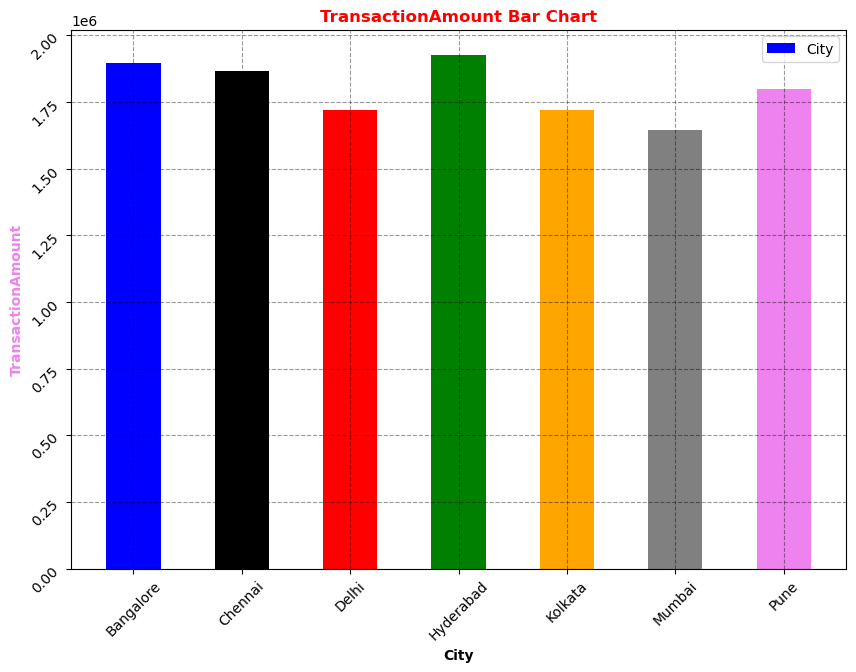

In [110]:
#  Create a bar plot showing the total TransactionAmount for each City .
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
plt.bar(x=cities_sales["City"],height=cities_sales["TransactionAmount"],color=["blue","black","red","green","orange","grey","violet"],label="City",width=0.5)
plt.legend()
plt.grid(True,color="black",ls="--",alpha=0.4)
plt.title("TransactionAmount Bar Chart",color="red",fontweight="bold")
plt.xlabel("City",color="k",fontweight="bold")
plt.ylabel("TransactionAmount",color="violet",fontweight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

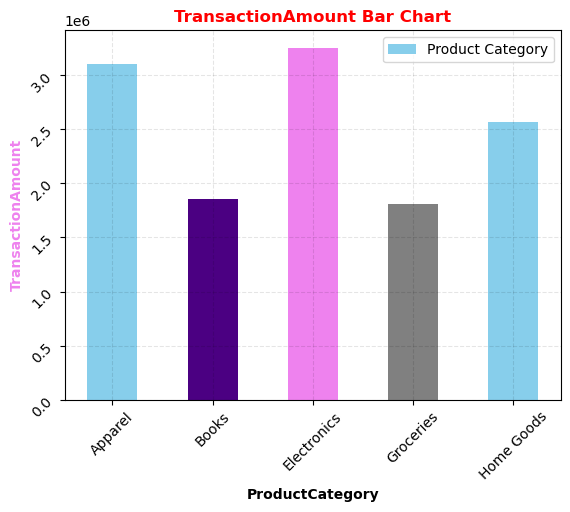

In [114]:
# 2. Visualize the total sales amount by ProductCategory using a bar plot.
total_sales_amt=combined_data.groupby("ProductCategory")["TransactionAmount"].sum().reset_index()
plt.bar(x=total_sales_amt["ProductCategory"],height=total_sales_amt["TransactionAmount"],color=["skyblue","indigo","violet","grey"],label="Product Category",width=0.5)
plt.legend()
plt.grid(True,color="black",ls="--",alpha=0.1)
plt.title("TransactionAmount Bar Chart",color="red",fontweight="bold")
plt.xlabel("ProductCategory",color="k",fontweight="bold")
plt.ylabel("TransactionAmount",color="violet",fontweight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

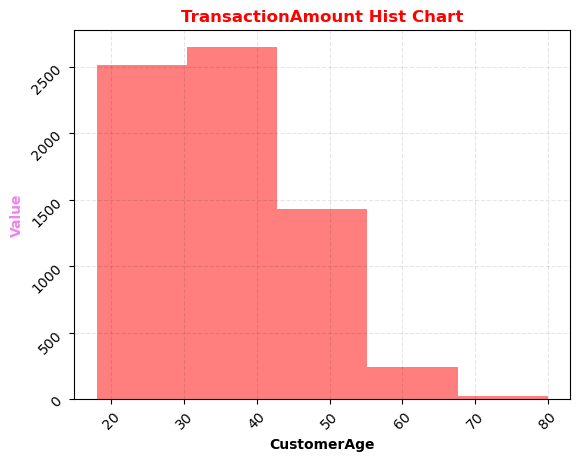

In [117]:
# 3. Create a histogram of the CustomerAge distribution for customers who made a
 #purchase.
plt.hist(x=combined_data["CustomerAge"],bins=5,color="red",alpha=0.5)
plt.grid(True,color="black",ls="--",alpha=0.1)
plt.title("TransactionAmount Hist Chart",color="red",fontweight="bold")
plt.xlabel("CustomerAge",color="k",fontweight="bold")
plt.ylabel("Value",color="violet",fontweight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

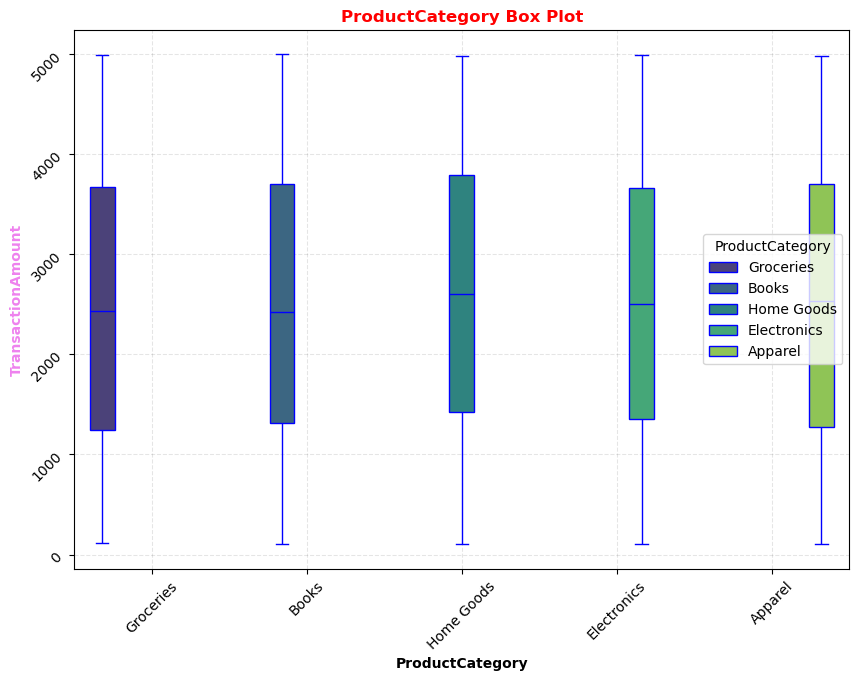

In [120]:
# 4. Use a box plot to show the distribution of TransactionAmount across different
# ProductCategory s.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.boxplot(x=combined_data["ProductCategory"],y=combined_data["TransactionAmount"],data=combined_data,hue=combined_data["ProductCategory"],palette="viridis",dodge=True,linecolor="blue",width=0.8)
plt.grid(True,color="black",ls="--",alpha=0.1)
plt.title("ProductCategory Box Plot",color="red",fontweight="bold")
plt.xlabel("ProductCategory",color="k",fontweight="bold")
plt.ylabel("TransactionAmount",color="violet",fontweight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

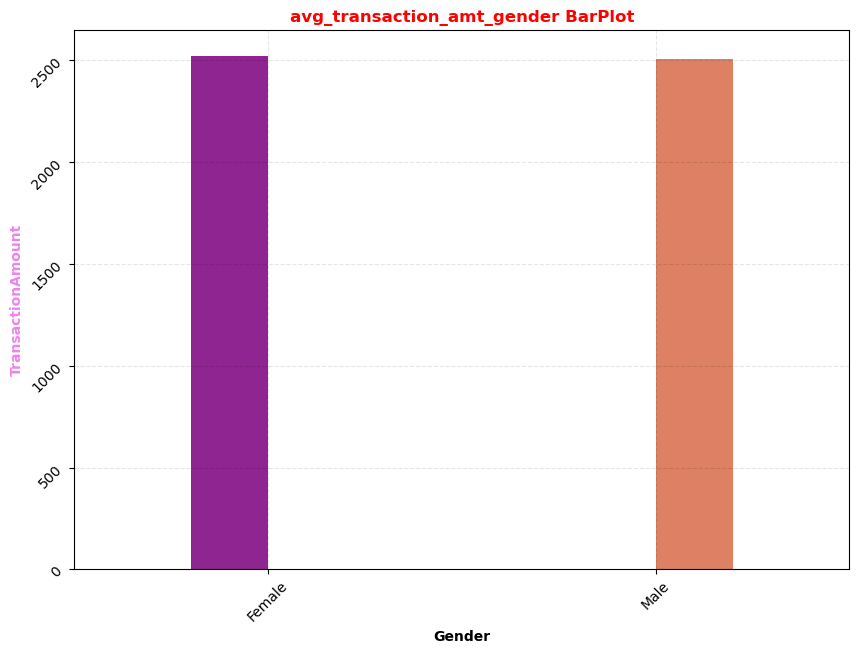

In [122]:
# 5.5. Create a bar plot to show the average TransactionAmount by Gender .
avg_transaction_amt_gender=combined_data.groupby("Gender")["TransactionAmount"].mean().reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x=avg_transaction_amt_gender["Gender"],y=avg_transaction_amt_gender["TransactionAmount"],data=avg_transaction_amt_gender,hue=avg_transaction_amt_gender["Gender"],palette="plasma",saturation=0.8,width=0.4,dodge=True)
plt.grid(True,color="black",ls="--",alpha=0.1)
plt.title("avg_transaction_amt_gender BarPlot",color="red",fontweight="bold")
plt.xlabel("Gender",color="k",fontweight="bold")
plt.ylabel("TransactionAmount",color="violet",fontweight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()